In [1]:
from datetime import datetime
import pandas as pd
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
#read in the health outcomes data
my_data = pd.read_csv('../New Data/DHA78_request_respiratory_county_cork_dublin.csv')
#look at a few lines
my_data.head()

,Year,Month,ISHMT,Area,All Hospital Discharges,"Hospital Discharges Per 1,000 Population"
0,2017,1,Acute upper respiratory infections & influenza...,Co. Cork,98,0.165181
1,2017,2,Acute upper respiratory infections & influenza...,Co. Cork,63,0.106188
2,2017,3,Acute upper respiratory infections & influenza...,Co. Cork,81,0.136528
3,2017,4,Acute upper respiratory infections & influenza...,Co. Cork,64,0.107874
4,2017,5,Acute upper respiratory infections & influenza...,Co. Cork,51,0.085962


In [3]:
#see what values are numerical and what they look like
my_data.describe()

,Year,Month,All Hospital Discharges,"Hospital Discharges Per 1,000 Population"
count,1176.000000,1176.000000,1176.000000,1176.000000
mean,2020.000000,6.500000,156.455782,0.146192
std,2.000851,3.453521,115.230624,0.075583
min,2017.000000,1.000000,5.000000,0.005328
25%,2018.000000,3.750000,70.000000,0.095741
50%,2020.000000,6.500000,126.000000,0.126479
75%,2022.000000,9.250000,197.000000,0.187108
max,2023.000000,12.000000,842.000000,0.560790


In [4]:
#look at datatypes
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      1176 non-null   int64  
 1   Month                                     1176 non-null   int64  
 2   ISHMT                                     1176 non-null   object 
 3   Area                                      1176 non-null   object 
 4   All Hospital Discharges                   1176 non-null   int64  
 5   Hospital Discharges Per 1,000 Population  1176 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 55.3+ KB


In [5]:
#look at all data
hosp_discharges = my_data

In [6]:
#don't include the totals like Ireland, or Non-residents as they can't be matched back to the air quality data based on county
hosp_discharges = hosp_discharges[hosp_discharges['Area']!= 'Ireland plus non-residents']
hosp_discharges = hosp_discharges[hosp_discharges['Area']!= 'Ireland']
hosp_discharges = hosp_discharges[hosp_discharges['Area']!= 'Non-residents']

In [7]:
#look at data
hosp_discharges

,Year,Month,ISHMT,Area,All Hospital Discharges,"Hospital Discharges Per 1,000 Population"
0,2017,1,Acute upper respiratory infections & influenza...,Co. Cork,98,0.165181
1,2017,2,Acute upper respiratory infections & influenza...,Co. Cork,63,0.106188
2,2017,3,Acute upper respiratory infections & influenza...,Co. Cork,81,0.136528
3,2017,4,Acute upper respiratory infections & influenza...,Co. Cork,64,0.107874
4,2017,5,Acute upper respiratory infections & influenza...,Co. Cork,51,0.085962
...,...,...,...,...,...,...
1171,2023,8,Pneumonia (J12-J18),Co. Dublin,286,0.190482
1172,2023,9,Pneumonia (J12-J18),Co. Dublin,269,0.179160
1173,2023,10,Pneumonia (J12-J18),Co. Dublin,358,0.238436
1174,2023,11,Pneumonia (J12-J18),Co. Dublin,399,0.265743


In [8]:
#get uniques values of Year
hosp_discharges['Year'].unique()

array([2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [9]:
#get uniques values of Diagnosis
hosp_discharges['ISHMT'].unique()

array(['Acute upper respiratory infections & influenza (J00-J11)',
       'Asthma (J45-J46)',
       'Chronic obstructive pulmonary disease & bronchiectasis (J40-J44, J47)',
       'Other acute lower respiratory infections (J20-J22)',
       'Other diseases of the respiratory system (J60-J99)',
       'Other diseases of upper respiratory tract (J30-J34, J36-J39)',
       'Pneumonia (J12-J18)'], dtype=object)

In [10]:
#get uniques values of Area
hosp_discharges['Area'].unique()

array(['Co. Cork', 'Co. Dublin'], dtype=object)

In [11]:
#replace any supressed (-1) data with NaN
hosp_discharges.replace(-1, np.nan, inplace=True)

In [12]:
#count if any values are missing
hosp_discharges.isnull().sum()

Year                                        0
Month                                       0
ISHMT                                       0
Area                                        0
All Hospital Discharges                     0
Hospital Discharges Per 1,000 Population    0
dtype: int64

In [13]:
#concat the month to the year to get a timeline chart
hosp_discharges['date'] = pd.to_datetime(hosp_discharges['Year'].astype(str) + '-' + hosp_discharges['Month'].astype(str))

print(hosp_discharges[['Year', 'Month', 'date']])

      Year  Month       date
0     2017      1 2017-01-01
1     2017      2 2017-02-01
2     2017      3 2017-03-01
3     2017      4 2017-04-01
4     2017      5 2017-05-01
...    ...    ...        ...
1171  2023      8 2023-08-01
1172  2023      9 2023-09-01
1173  2023     10 2023-10-01
1174  2023     11 2023-11-01
1175  2023     12 2023-12-01

[1176 rows x 3 columns]


In [14]:
hosp_discharges

,Year,Month,ISHMT,Area,All Hospital Discharges,"Hospital Discharges Per 1,000 Population",date
0,2017,1,Acute upper respiratory infections & influenza...,Co. Cork,98,0.165181,2017-01-01
1,2017,2,Acute upper respiratory infections & influenza...,Co. Cork,63,0.106188,2017-02-01
2,2017,3,Acute upper respiratory infections & influenza...,Co. Cork,81,0.136528,2017-03-01
3,2017,4,Acute upper respiratory infections & influenza...,Co. Cork,64,0.107874,2017-04-01
4,2017,5,Acute upper respiratory infections & influenza...,Co. Cork,51,0.085962,2017-05-01
...,...,...,...,...,...,...,...
1171,2023,8,Pneumonia (J12-J18),Co. Dublin,286,0.190482,2023-08-01
1172,2023,9,Pneumonia (J12-J18),Co. Dublin,269,0.179160,2023-09-01
1173,2023,10,Pneumonia (J12-J18),Co. Dublin,358,0.238436,2023-10-01
1174,2023,11,Pneumonia (J12-J18),Co. Dublin,399,0.265743,2023-11-01


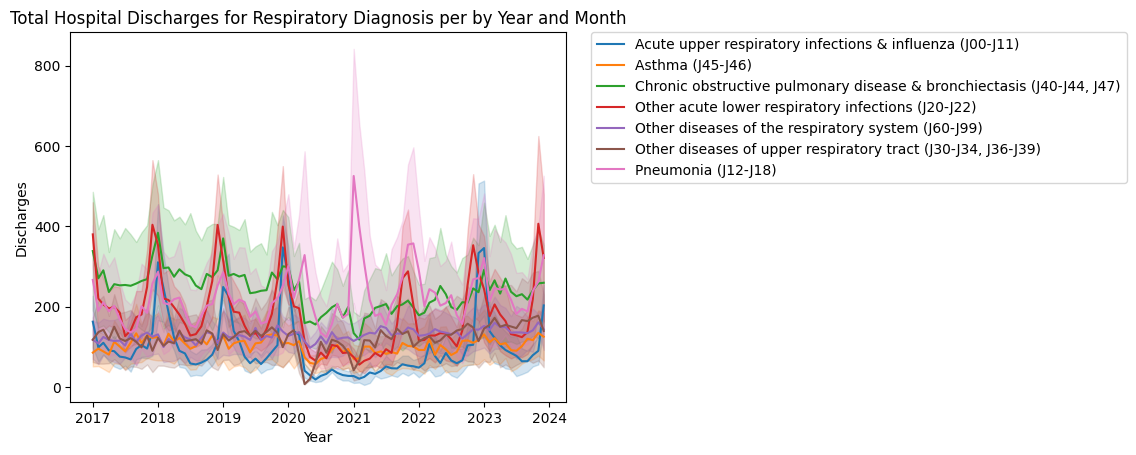

In [15]:
#plot All Hospital Discharges
sns.lineplot(data=hosp_discharges, x='date', y='All Hospital Discharges', hue='ISHMT')
plt.title('Total Hospital Discharges for Respiratory Diagnosis per by Year and Month')
plt.xlabel('Year')
plt.ylabel('Discharges')
#put legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('total_hospital_discharges_ISHMT_date.png', format='png', bbox_inches='tight')
plt.show()


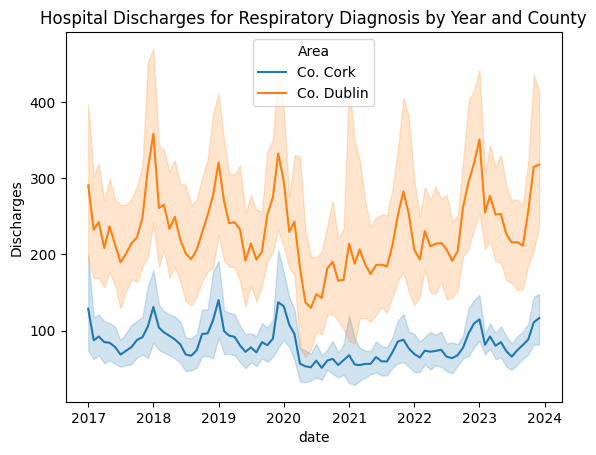

In [16]:
#plot again but separate out Dublin and Cork
sns.lineplot(data=hosp_discharges, x='date', y='All Hospital Discharges', hue='Area')
plt.title('Hospital Discharges for Respiratory Diagnosis by Year and County')
plt.xlabel('date')
plt.ylabel('Discharges')
plt.savefig('dublin_hospital_discharges_sex_year.png', format='png', bbox_inches='tight')
plt.show()

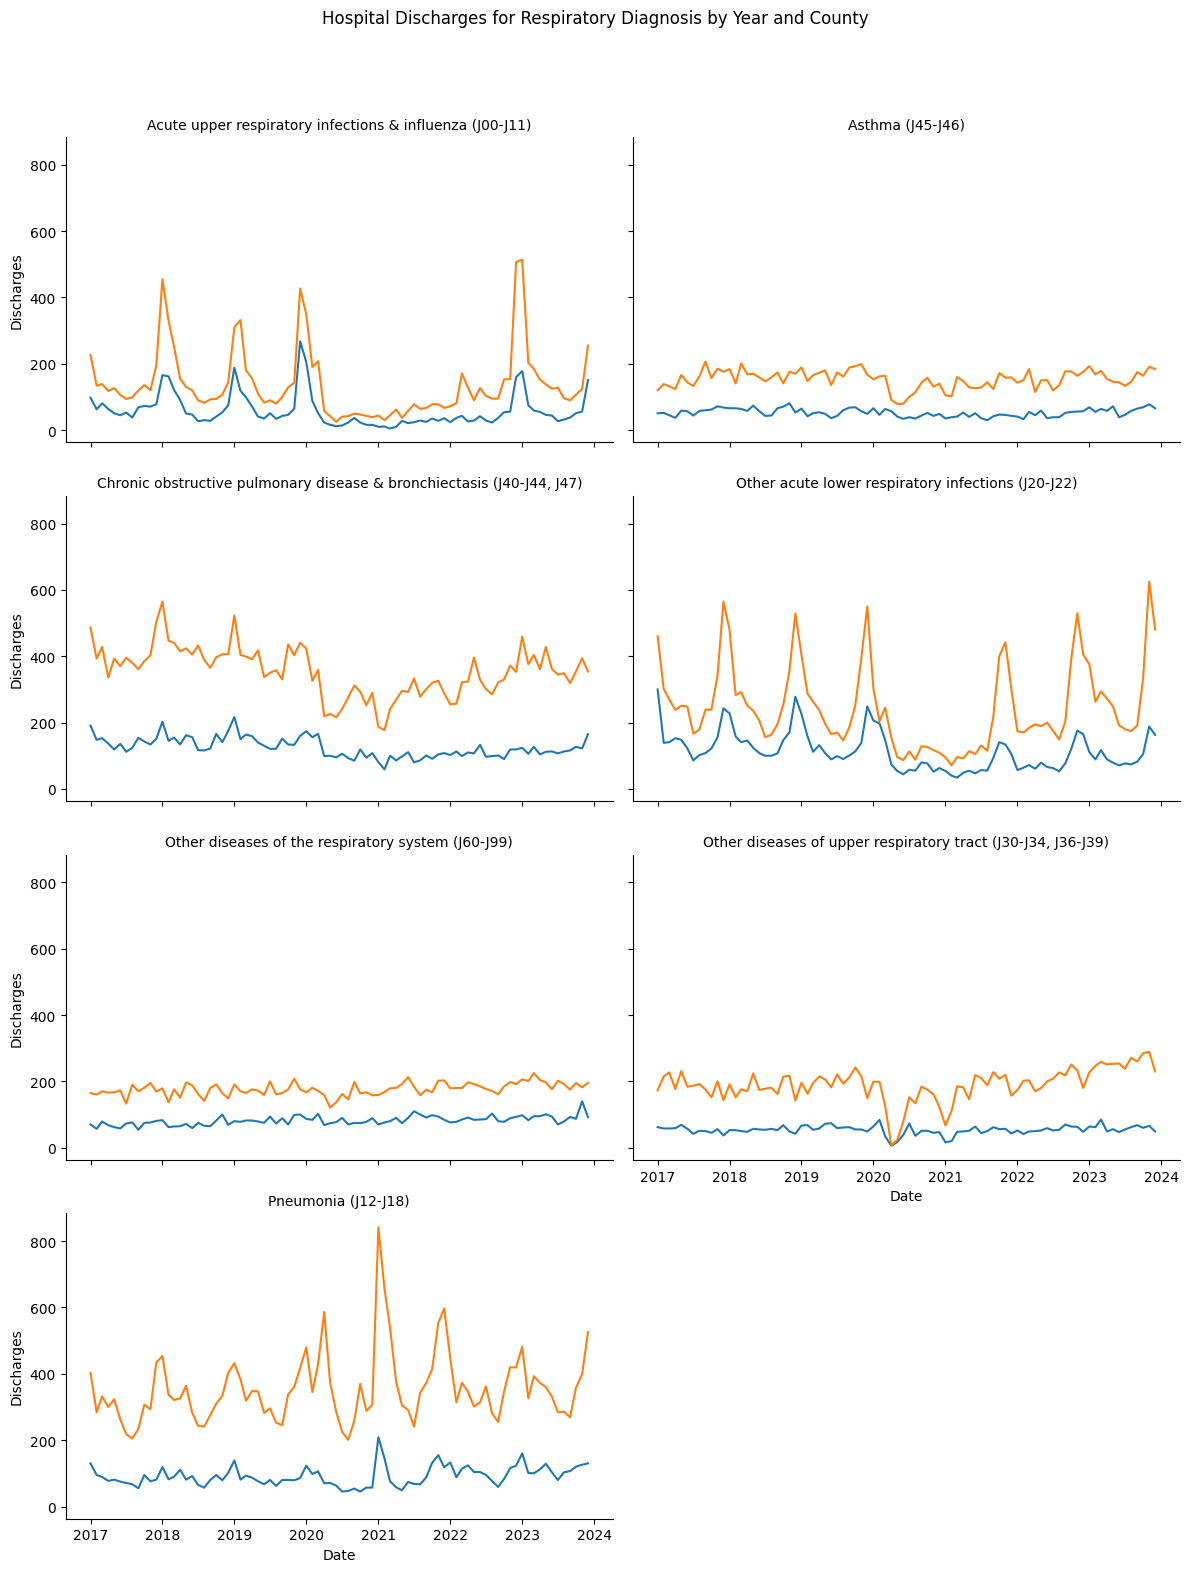

In [17]:
#facet grid to separate out by disease
g = sns.FacetGrid(hosp_discharges, col='ISHMT', col_wrap=2, height=4, aspect=1.5)
g.map(sns.lineplot, 'date', 'All Hospital Discharges', 'Area')
g.set_titles('{col_name}')
g.set_axis_labels('Date', 'Discharges')

#adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Hospital Discharges for Respiratory Diagnosis by Year and County')

#save
g.savefig('dublin_hospital_discharges_ISHMT_facet.png', format='png', bbox_inches='tight')

plt.show()

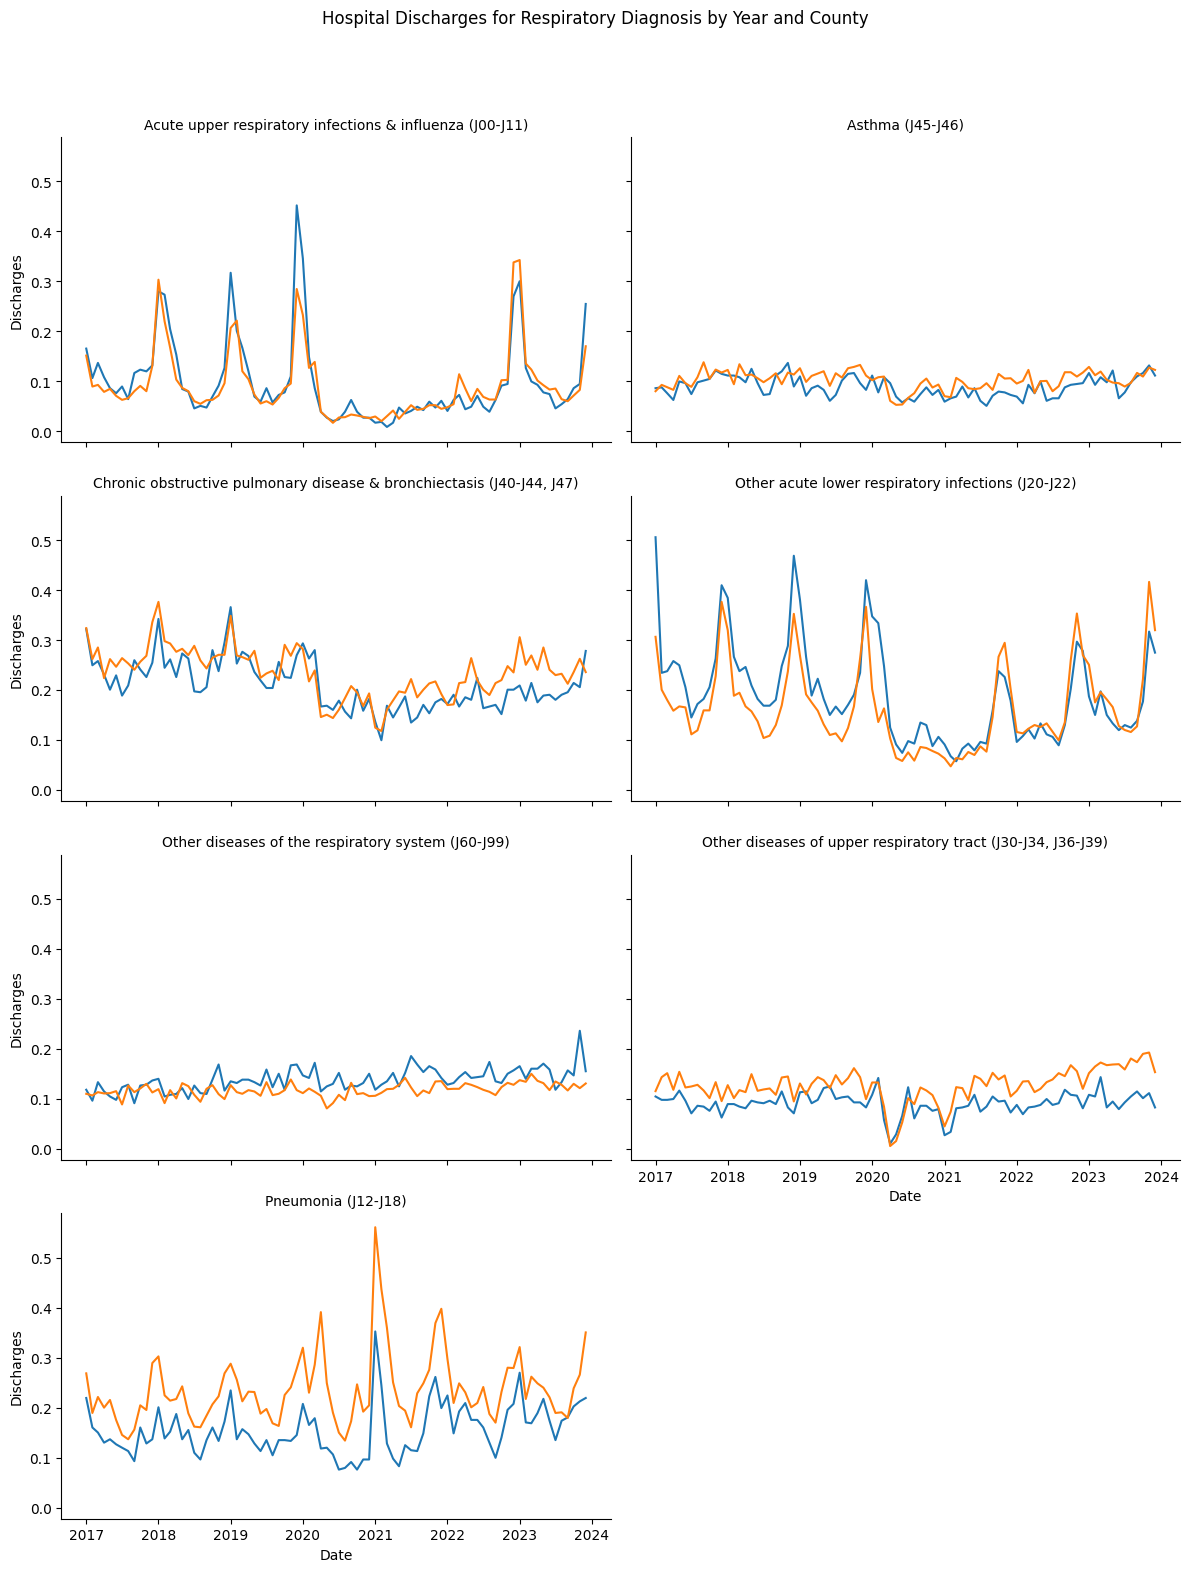

In [18]:
#look at it by 'Hospital Discharges Per 1,000 Population' now
g = sns.FacetGrid(hosp_discharges, col='ISHMT', col_wrap=2, height=4, aspect=1.5)
g.map(sns.lineplot, 'date', 'Hospital Discharges Per 1,000 Population', 'Area')
g.set_titles('{col_name}')
g.set_axis_labels('Date', 'Discharges')

#adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Hospital Discharges for Respiratory Diagnosis by Year and County')

#save
g.savefig('dublin_hospital_discharges_ISHMT_facet.png', format='png', bbox_inches='tight')

plt.show()

In [19]:
#read in the air quality data
my_air_data1 = pd.read_csv('air_quality_data_Jul_Dec_2023.csv')
my_air_data2 = pd.read_csv('air_quality_data_Jan_Jun_2023.csv')
my_air_data3 = pd.read_csv('air_quality_data_Jan_Dec_2022.csv')
my_air_data4 = pd.read_csv('air_quality_data_Jan_Dec_2021.csv')

In [20]:
my_air_data5 = pd.read_csv('air_quality_data_Jan_Dec_2020.csv')

In [21]:
#look at a few lines
my_air_data1.head()

,Timestamp,Value,PM,Location
0,2023-07-01 01:00:00,5.89,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
1,2023-07-01 02:00:00,3.15,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
2,2023-07-01 03:00:00,3.31,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
3,2023-07-01 04:00:00,3.86,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
4,2023-07-01 05:00:00,11.29,2.5,"Air Quality Levels at Briarhill, Co. Galway'"


In [22]:
#look at a few lines
my_air_data2.head()

,Timestamp,Value,PM,Location
0,2023-01-01 01:00:00,15.06,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
1,2023-01-01 02:00:00,18.95,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
2,2023-01-01 03:00:00,18.98,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
3,2023-01-01 04:00:00,16.64,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
4,2023-01-01 05:00:00,17.66,2.5,"Air Quality Levels at Briarhill, Co. Galway'"


In [23]:
#look at a few lines
my_air_data3.head()

,Timestamp,Value,PM,Location
0,2022-12-22 12:00:00,7.48,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
1,2022-12-22 13:00:00,12.42,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
2,2022-12-22 14:00:00,10.33,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
3,2022-12-22 15:00:00,11.30,2.5,"Air Quality Levels at Briarhill, Co. Galway'"
4,2022-12-22 16:00:00,19.97,2.5,"Air Quality Levels at Briarhill, Co. Galway'"


In [24]:
#look at a few lines
my_air_data4.head()

,Timestamp,Value,PM,Location
0,2021-02-19 00:00:00,3.8,2.5,"Air Quality Levels at Claremorris, Co. Mayo'"
1,2021-10-19 00:00:00,3.8,2.5,"Air Quality Levels at Claremorris, Co. Mayo'"
2,2021-11-09 00:00:00,1.8,2.5,"Air Quality Levels at Claremorris, Co. Mayo'"
3,2021-11-16 00:00:00,3.5,2.5,"Air Quality Levels at Claremorris, Co. Mayo'"
4,2021-11-17 00:00:00,4.2,2.5,"Air Quality Levels at Claremorris, Co. Mayo'"


In [25]:
#look at a few lines
my_air_data5.head()

,Timestamp,Value,PM,Location
0,2020-12-15 17:00:00,3.83,2.5,"Air Quality Levels at Carrick-on-Shannon, Co. ..."
1,2020-12-15 18:00:00,4.73,2.5,"Air Quality Levels at Carrick-on-Shannon, Co. ..."
2,2020-12-15 19:00:00,4.79,2.5,"Air Quality Levels at Carrick-on-Shannon, Co. ..."
3,2020-12-15 20:00:00,6.04,2.5,"Air Quality Levels at Carrick-on-Shannon, Co. ..."
4,2020-12-15 21:00:00,6.99,2.5,"Air Quality Levels at Carrick-on-Shannon, Co. ..."


In [26]:
# merge data togehter
my_air_data =pd.concat([my_air_data1, my_air_data2, my_air_data3, my_air_data4])


In [27]:
#add in 2020
my_air_data_1_5 = pd.concat([my_air_data, my_air_data5])

In [28]:
#assign to my_air_data so as not to have to redo all code
my_air_data = my_air_data_1_5

In [29]:
#look at the data
my_air_data.describe()

,Value,PM
count,4.060899e+06,4.060899e+06
mean,1.040329e+01,6.362803e+00
std,1.247325e+01,3.748303e+00
min,0.000000e+00,2.500000e+00
25%,4.320000e+00,2.500000e+00
50%,7.480000e+00,1.000000e+01
75%,1.268000e+01,1.000000e+01
max,2.010800e+03,1.000000e+01


In [30]:
#look at min
my_air_data['Value'].min()

0.0

In [31]:
#look at max
my_air_data['Value'].max()

2010.8

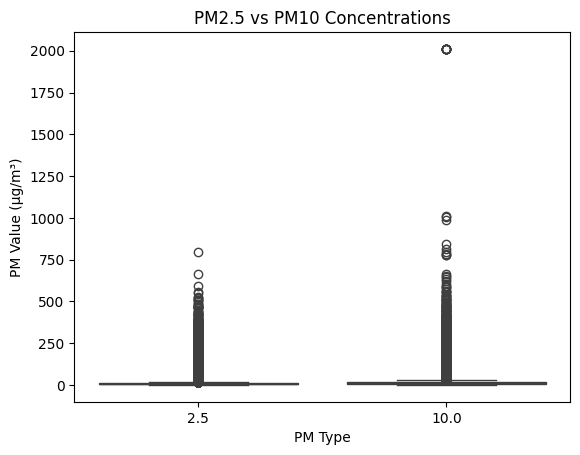

In [32]:
#look at value and see if there are many outliers
sns.boxplot(x='PM', y='Value',data=my_air_data)
plt.title('PM2.5 vs PM10 Concentrations')
plt.xlabel('PM Type')
plt.ylabel('PM Value (µg/m³)')
plt.show()

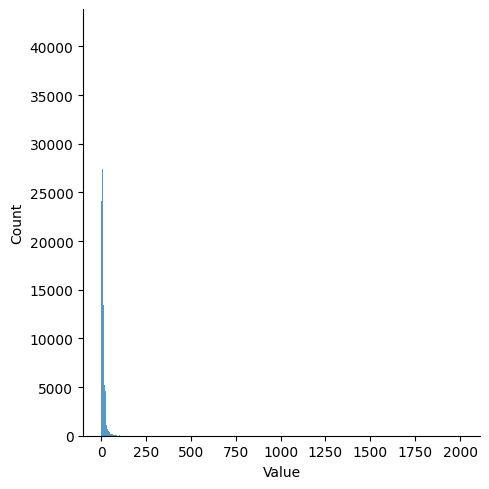

In [33]:
#look at distribution
sns.displot(my_air_data['Value'])

In [34]:
#Look at the data types
my_air_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4060899 entries, 0 to 435933
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  object 
 1   Value      float64
 2   PM         float64
 3   Location   object 
dtypes: float64(2), object(2)
memory usage: 154.9+ MB


In [35]:
#start cleaning and prepping the data

#convert timestamp to datetime
my_air_data['Timestamp'] =  pd.to_datetime(my_air_data['Timestamp'] )

In [36]:
#check that it worked
my_air_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4060899 entries, 0 to 435933
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Timestamp  datetime64[ns]
 1   Value      float64       
 2   PM         float64       
 3   Location   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 154.9+ MB


In [37]:
#make a year field
my_air_data['Year'] =  my_air_data['Timestamp'].dt.year 
my_air_data['Month'] =  my_air_data['Timestamp'].dt.month 

In [38]:
#check all years are in 
my_air_data['Year'].unique()

array([2023, 2022, 2021, 2020])

In [39]:
#look at unique locations
my_air_data['Location'].unique()

array(["Air Quality Levels at Briarhill, Co. Galway'",
       "Air Quality Levels at Lucan, Co. Dublin'",
       "Air Quality Levels at Killarney Anam Arts and Cultural Centre, Co. Kerry'",
       "Air Quality Levels at Leixlip Library, Co. Kildare'",
       "Air Quality Levels at Eyre Square, Galway'",
       "Air Quality Levels at Cork Lower Glanmire Road'",
       "Air Quality Levels at Claremorris, Co. Mayo'",
       "Air Quality Levels at Edenderry Library, Co. Offaly'",
       "Air Quality Levels at Greystones Fire Station'",
       "Air Quality Levels at Ballinasloe, Co. Galway'",
       "Air Quality Levels at Amiens Street, Dublin 1'",
       "Air Quality Levels at Cork Airport'",
       "Air Quality Levels at Clonakilty, Co. Cork'",
       "Air Quality Levels at Carrigaline, Co. Cork'",
       "Air Quality Levels at Merchants Quay, Waterford City'",
       "Air Quality Levels at Henry Street, Limerick'",
       "Air Quality Levels at Drogheda, Co. Louth'",
       "Air Quality 

In [40]:
#clean the locations, extract the counties
my_air_data['County'] = my_air_data['Location'].str.rsplit(',').str[-1] 
my_air_data['County'] = my_air_data['County'].str.replace("'", "").str.strip()

In [41]:
#look at unique counties
my_air_data['County'].unique()

array(['Co. Galway', 'Co. Dublin', 'Co. Kerry', 'Co. Kildare', 'Galway',
       'Air Quality Levels at Cork Lower Glanmire Road', 'Co. Mayo',
       'Co. Offaly', 'Air Quality Levels at Greystones Fire Station',
       'Dublin 1', 'Air Quality Levels at Cork Airport', 'Co. Cork',
       'Waterford City', 'Limerick', 'Co. Louth', 'Co. Leitrim',
       'Air Quality Levels at Cavan Town', 'Co. Tipperary',
       'Co. Limerick', 'Co. Westmeath', 'Dublin 2', 'Co. Meath',
       'Air Quality Levels at Tipperary Town', 'Co. Donegal',
       'Air Quality Levels at Wexford Opera House',
       'Air Quality Levels at Paddy Browne\\', 'Dublin 8',
       'Air Quality Levels at Carlow Town',
       'Air Quality Levels at Roscommon Town',
       'Air Quality Levels at St. Anne\\', 'Dublin 10', 'Dublin 12',
       'Dublin 3', 'Dublin 11', 'Dublin 24',
       'Air Quality Levels at Longford Town',
       'Air Quality Levels at People\\', 'Kilkenny', 'Dublin 14',
       'Dublin 15', 'Co. Clare', 'Co. W

In [42]:
#set counties
counties = ['Dublin',  'Cork']

#filter rows where Location contains one of the counties
my_air_data_filtered = my_air_data[my_air_data['Location'].str.contains('|'.join(counties), case=False)]

In [43]:
#check the numbers for each location
my_air_data_filtered.County.value_counts()

County
Dublin 15                                         233944
Dublin 4                                          224036
Co. Cork                                          177461
Co. Dublin                                        162321
Dublin 8                                          115586
Dublin 1                                           93166
Cork                                               74369
Dublin 3                                           60900
Dublin 10                                          60792
Dublin 11                                          60248
Dublin 12                                          59648
Dublin 24                                          59192
Dublin 6                                           52305
Dublin 14                                          44660
Dublin 2                                           31410
Air Quality Levels at Cork Harbour                 29352
Air Quality Levels at University College Cork      21607
Air Quality Levels at Co

In [44]:
#create a date field
my_air_data_filtered['date'] = pd.to_datetime(my_air_data_filtered['Year'].astype(str) + '-' + my_air_data_filtered['Month'].astype(str))


C:\Users\lsmyth\AppData\Local\Temp\ipykernel_3804\364316612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_air_data_filtered['date'] = pd.to_datetime(my_air_data_filtered['Year'].astype(str) + '-' + my_air_data_filtered['Month'].astype(str))


In [45]:
#function to extract the county location
def extract_county(location):
    if isinstance(location, str):  # check if it's a string
        if 'dublin' in location.lower():
            return 'Dublin'
        elif 'cork' in location.lower():
            return 'Cork'
        else:
            return 'Unknown'  # or np.nan if you want to ignore others

# Apply function to Location column
my_air_data_filtered['County_clean'] = my_air_data_filtered['County'].apply(extract_county)

C:\Users\lsmyth\AppData\Local\Temp\ipykernel_3804\913122692.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_air_data_filtered['County_clean'] = my_air_data_filtered['County'].apply(extract_county)


In [46]:
#have a look
my_air_data_filtered.head(120)

,Timestamp,Value,PM,Location,Year,Month,County,date,County_clean
6698,2023-07-01 01:00:00,2.57,2.5,"Air Quality Levels at Lucan, Co. Dublin'",2023,7,Co. Dublin,2023-07-01,Dublin
6699,2023-07-01 02:00:00,1.80,2.5,"Air Quality Levels at Lucan, Co. Dublin'",2023,7,Co. Dublin,2023-07-01,Dublin
6700,2023-07-01 03:00:00,1.54,2.5,"Air Quality Levels at Lucan, Co. Dublin'",2023,7,Co. Dublin,2023-07-01,Dublin
6701,2023-07-01 04:00:00,1.57,2.5,"Air Quality Levels at Lucan, Co. Dublin'",2023,7,Co. Dublin,2023-07-01,Dublin
6702,2023-07-01 05:00:00,1.44,2.5,"Air Quality Levels at Lucan, Co. Dublin'",2023,7,Co. Dublin,2023-07-01,Dublin
...,...,...,...,...,...,...,...,...,...
6813,2023-07-05 20:00:00,2.88,2.5,"Air Quality Levels at Lucan, Co. Dublin'",2023,7,Co. Dublin,2023-07-01,Dublin
6814,2023-07-05 21:00:00,3.22,2.5,"Air Quality Levels at Lucan, Co. Dublin'",2023,7,Co. Dublin,2023-07-01,Dublin
6815,2023-07-05 22:00:00,2.80,2.5,"Air Quality Levels at Lucan, Co. Dublin'",2023,7,Co. Dublin,2023-07-01,Dublin
6816,2023-07-05 23:00:00,2.80,2.5,"Air Quality Levels at Lucan, Co. Dublin'",2023,7,Co. Dublin,2023-07-01,Dublin


In [47]:
#drop old 'Location' and 'County'
my_air_data_filtered = my_air_data_filtered.drop(columns=['Location', 'County'])

In [48]:
#rename 'County_clean' to 'County'
my_air_data_filtered = my_air_data_filtered.rename(columns={'County_clean': 'County'})
my_air_data_filtered.head(120)

,Timestamp,Value,PM,Year,Month,date,County
6698,2023-07-01 01:00:00,2.57,2.5,2023,7,2023-07-01,Dublin
6699,2023-07-01 02:00:00,1.80,2.5,2023,7,2023-07-01,Dublin
6700,2023-07-01 03:00:00,1.54,2.5,2023,7,2023-07-01,Dublin
6701,2023-07-01 04:00:00,1.57,2.5,2023,7,2023-07-01,Dublin
6702,2023-07-01 05:00:00,1.44,2.5,2023,7,2023-07-01,Dublin
...,...,...,...,...,...,...,...
6813,2023-07-05 20:00:00,2.88,2.5,2023,7,2023-07-01,Dublin
6814,2023-07-05 21:00:00,3.22,2.5,2023,7,2023-07-01,Dublin
6815,2023-07-05 22:00:00,2.80,2.5,2023,7,2023-07-01,Dublin
6816,2023-07-05 23:00:00,2.80,2.5,2023,7,2023-07-01,Dublin


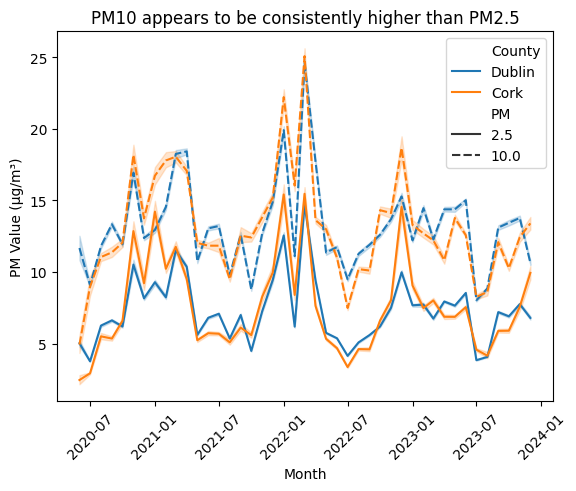

In [49]:
#look at PMs over the 4 years
sns.lineplot(data=my_air_data_filtered, x='date', y='Value', hue='County',style='PM')
plt.title('PM10 appears to be consistently higher than PM2.5')
plt.xlabel('Month')
plt.ylabel('PM Value (µg/m³)')
plt.xticks(rotation=45)
#plt.xticks([2020, 2021, 2022, 2023])

plt.savefig('county_pm_values_plot.png', format='png', bbox_inches='tight')
plt.show()

In [50]:
#aggregate to month level now - get the mean pm values per month for each county
monthly_avg = my_air_data_filtered.groupby(['County', 'PM', 'date'])['Value'].mean().reset_index()
pd.reset_option('display.max_rows')
print(monthly_avg)

     County    PM       date      Value
0      Cork   2.5 2020-06-01   2.449595
1      Cork   2.5 2020-07-01   2.918698
2      Cork   2.5 2020-08-01   5.503203
3      Cork   2.5 2020-09-01   5.348747
4      Cork   2.5 2020-10-01   6.587163
..      ...   ...        ...        ...
167  Dublin  10.0 2023-08-01   8.849873
168  Dublin  10.0 2023-09-01  13.106326
169  Dublin  10.0 2023-10-01  13.438059
170  Dublin  10.0 2023-11-01  13.776940
171  Dublin  10.0 2023-12-01  10.640430

[172 rows x 4 columns]


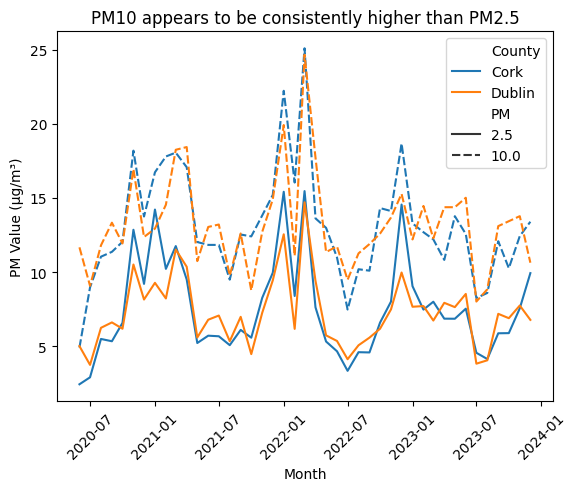

In [51]:
#look at the chart 
sns.lineplot(data=monthly_avg, x='date', y='Value', hue='County',style='PM')
plt.title('PM10 appears to be consistently higher than PM2.5')
plt.xlabel('Month')
plt.ylabel('PM Value (µg/m³)')
plt.xticks(rotation=45)
#plt.xticks([2020, 2021, 2022, 2023])

plt.savefig('county_pm_values_plot.png', format='png', bbox_inches='tight')
plt.show()

In [52]:
#reshape to break out pm2.5 and pm10 so its ready to merge with hosp_discharges
reshaped_monthly_avg = monthly_avg.pivot(index=['County', 'date'], columns='PM', values='Value').reset_index()
reshaped_monthly_avg.columns.name = None
reshaped_monthly_avg = reshaped_monthly_avg.rename(columns={2.5: 'PM2.5', 10: 'PM10'})

print(reshaped_monthly_avg)

    County       date     PM2.5       PM10
0     Cork 2020-06-01  2.449595   4.925600
1     Cork 2020-07-01  2.918698   8.976464
2     Cork 2020-08-01  5.503203  11.047632
3     Cork 2020-09-01  5.348747  11.373366
4     Cork 2020-10-01  6.587163  12.050000
..     ...        ...       ...        ...
81  Dublin 2023-08-01  4.065971   8.849873
82  Dublin 2023-09-01  7.197300  13.106326
83  Dublin 2023-10-01  6.902304  13.438059
84  Dublin 2023-11-01  7.755754  13.776940
85  Dublin 2023-12-01  6.790422  10.640430

[86 rows x 4 columns]


In [53]:
#remove 'Co. ' prefix from Area to match County_clean
hosp_discharges['County_clean'] = hosp_discharges['Area'].str.replace('Co. ', '', regex=False)
hosp_discharges

,Year,Month,ISHMT,Area,All Hospital Discharges,"Hospital Discharges Per 1,000 Population",date,County_clean
0,2017,1,Acute upper respiratory infections & influenza...,Co. Cork,98,0.165181,2017-01-01,Cork
1,2017,2,Acute upper respiratory infections & influenza...,Co. Cork,63,0.106188,2017-02-01,Cork
2,2017,3,Acute upper respiratory infections & influenza...,Co. Cork,81,0.136528,2017-03-01,Cork
3,2017,4,Acute upper respiratory infections & influenza...,Co. Cork,64,0.107874,2017-04-01,Cork
4,2017,5,Acute upper respiratory infections & influenza...,Co. Cork,51,0.085962,2017-05-01,Cork
...,...,...,...,...,...,...,...,...
1171,2023,8,Pneumonia (J12-J18),Co. Dublin,286,0.190482,2023-08-01,Dublin
1172,2023,9,Pneumonia (J12-J18),Co. Dublin,269,0.179160,2023-09-01,Dublin
1173,2023,10,Pneumonia (J12-J18),Co. Dublin,358,0.238436,2023-10-01,Dublin
1174,2023,11,Pneumonia (J12-J18),Co. Dublin,399,0.265743,2023-11-01,Dublin


In [54]:
#filter and drop what's not needed
hosp_discharges_filtered = hosp_discharges.drop(columns=['Area', 'All Hospital Discharges'])
hosp_discharges_filtered = hosp_discharges_filtered[hosp_discharges_filtered['date']>'2020-05-31']
hosp_discharges_filtered = hosp_discharges_filtered[hosp_discharges_filtered['County_clean']!= 'Galway']
hosp_discharges_filtered

,Year,Month,ISHMT,"Hospital Discharges Per 1,000 Population",date,County_clean
41,2020,6,Acute upper respiratory infections & influenza...,0.020226,2020-06-01,Cork
42,2020,7,Acute upper respiratory infections & influenza...,0.023597,2020-07-01,Cork
43,2020,8,Acute upper respiratory infections & influenza...,0.038767,2020-08-01,Cork
44,2020,9,Acute upper respiratory infections & influenza...,0.062364,2020-09-01,Cork
45,2020,10,Acute upper respiratory infections & influenza...,0.038767,2020-10-01,Cork
...,...,...,...,...,...,...
1171,2023,8,Pneumonia (J12-J18),0.190482,2023-08-01,Dublin
1172,2023,9,Pneumonia (J12-J18),0.179160,2023-09-01,Dublin
1173,2023,10,Pneumonia (J12-J18),0.238436,2023-10-01,Dublin
1174,2023,11,Pneumonia (J12-J18),0.265743,2023-11-01,Dublin


In [55]:
#rename col
hosp_discharges_filtered = hosp_discharges_filtered.rename(columns={'County_clean': 'County'})
hosp_discharges_filtered

,Year,Month,ISHMT,"Hospital Discharges Per 1,000 Population",date,County
41,2020,6,Acute upper respiratory infections & influenza...,0.020226,2020-06-01,Cork
42,2020,7,Acute upper respiratory infections & influenza...,0.023597,2020-07-01,Cork
43,2020,8,Acute upper respiratory infections & influenza...,0.038767,2020-08-01,Cork
44,2020,9,Acute upper respiratory infections & influenza...,0.062364,2020-09-01,Cork
45,2020,10,Acute upper respiratory infections & influenza...,0.038767,2020-10-01,Cork
...,...,...,...,...,...,...
1171,2023,8,Pneumonia (J12-J18),0.190482,2023-08-01,Dublin
1172,2023,9,Pneumonia (J12-J18),0.179160,2023-09-01,Dublin
1173,2023,10,Pneumonia (J12-J18),0.238436,2023-10-01,Dublin
1174,2023,11,Pneumonia (J12-J18),0.265743,2023-11-01,Dublin


In [56]:
#merge hospital and air pollution data together on the date and county fields
merged_data = pd.merge(
    hosp_discharges_filtered,
    reshaped_monthly_avg,
    on=['County', 'date'],
    how='left'
)

In [57]:
merged_data

,Year,Month,ISHMT,"Hospital Discharges Per 1,000 Population",date,County,PM2.5,PM10
0,2020,6,Acute upper respiratory infections & influenza...,0.020226,2020-06-01,Cork,2.449595,4.925600
1,2020,7,Acute upper respiratory infections & influenza...,0.023597,2020-07-01,Cork,2.918698,8.976464
2,2020,8,Acute upper respiratory infections & influenza...,0.038767,2020-08-01,Cork,5.503203,11.047632
3,2020,9,Acute upper respiratory infections & influenza...,0.062364,2020-09-01,Cork,5.348747,11.373366
4,2020,10,Acute upper respiratory infections & influenza...,0.038767,2020-10-01,Cork,6.587163,12.050000
...,...,...,...,...,...,...,...,...
597,2023,8,Pneumonia (J12-J18),0.190482,2023-08-01,Dublin,4.065971,8.849873
598,2023,9,Pneumonia (J12-J18),0.179160,2023-09-01,Dublin,7.197300,13.106326
599,2023,10,Pneumonia (J12-J18),0.238436,2023-10-01,Dublin,6.902304,13.438059
600,2023,11,Pneumonia (J12-J18),0.265743,2023-11-01,Dublin,7.755754,13.776940


In [58]:
#check out the structure
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Year                                      602 non-null    int64         
 1   Month                                     602 non-null    int64         
 2   ISHMT                                     602 non-null    object        
 3   Hospital Discharges Per 1,000 Population  602 non-null    float64       
 4   date                                      602 non-null    datetime64[ns]
 5   County                                    602 non-null    object        
 6   PM2.5                                     602 non-null    float64       
 7   PM10                                      602 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 37.8+ KB


In [59]:
#check out the summary stats
merged_data.describe()

,Year,Month,"Hospital Discharges Per 1,000 Population",date,PM2.5,PM10
count,602.000000,602.000000,602.000000,602,602.000000,602.000000
mean,2021.674419,6.906977,0.136234,2022-03-02 01:06:58.604651264,7.430472,13.185699
min,2020.000000,1.000000,0.008428,2020-06-01 00:00:00,2.449595,4.925600
25%,2021.000000,4.000000,0.086284,2021-04-01 00:00:00,5.503203,11.270007
50%,2022.000000,7.000000,0.123129,2022-03-01 00:00:00,6.886840,12.606999
75%,2023.000000,10.000000,0.173609,2023-02-01 00:00:00,8.537144,14.381477
max,2023.000000,12.000000,0.560790,2023-12-01 00:00:00,15.466637,25.090409
std,1.051254,3.390991,0.071319,NaN,2.818943,3.457715


In [60]:
#rename discharge_rate
merged_data = merged_data.rename(columns={'Hospital Discharges Per 1,000 Population':'discharge_rate'})
merged_data

,Year,Month,ISHMT,discharge_rate,date,County,PM2.5,PM10
0,2020,6,Acute upper respiratory infections & influenza...,0.020226,2020-06-01,Cork,2.449595,4.925600
1,2020,7,Acute upper respiratory infections & influenza...,0.023597,2020-07-01,Cork,2.918698,8.976464
2,2020,8,Acute upper respiratory infections & influenza...,0.038767,2020-08-01,Cork,5.503203,11.047632
3,2020,9,Acute upper respiratory infections & influenza...,0.062364,2020-09-01,Cork,5.348747,11.373366
4,2020,10,Acute upper respiratory infections & influenza...,0.038767,2020-10-01,Cork,6.587163,12.050000
...,...,...,...,...,...,...,...,...
597,2023,8,Pneumonia (J12-J18),0.190482,2023-08-01,Dublin,4.065971,8.849873
598,2023,9,Pneumonia (J12-J18),0.179160,2023-09-01,Dublin,7.197300,13.106326
599,2023,10,Pneumonia (J12-J18),0.238436,2023-10-01,Dublin,6.902304,13.438059
600,2023,11,Pneumonia (J12-J18),0.265743,2023-11-01,Dublin,7.755754,13.776940


In [61]:
#output to csv for importing in other files
merged_data.to_csv('merged_data.csv')

In [62]:
#using mydata for next bit
mydata = merged_data

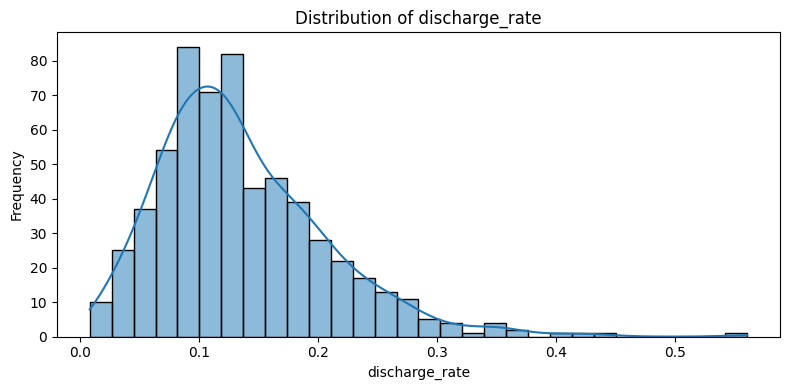

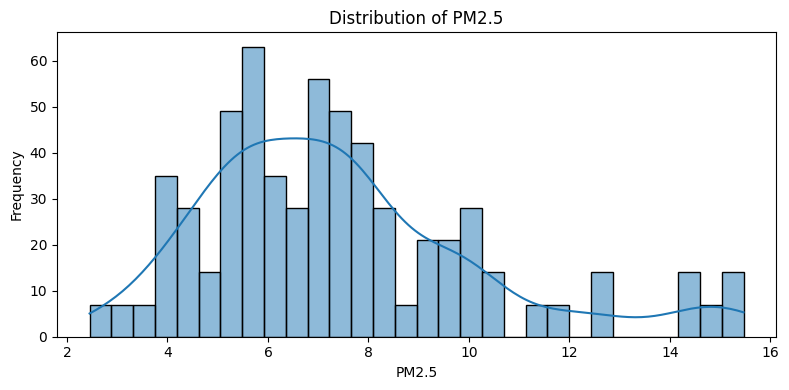

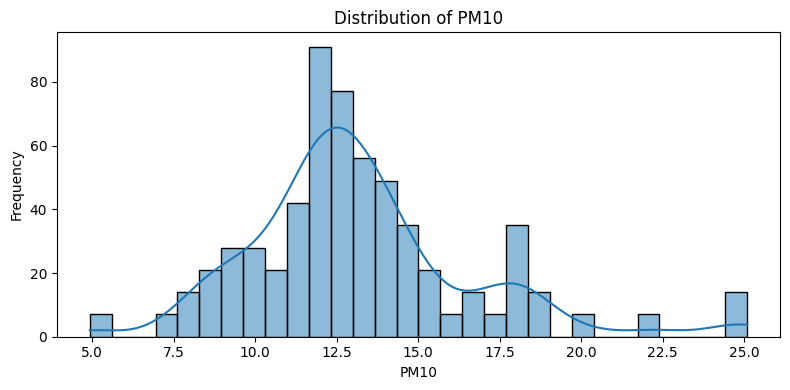

In [63]:
#look at the vars of interest
numeric_cols = ['discharge_rate', 'PM2.5', 'PM10']

#plot the distribution
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(mydata[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


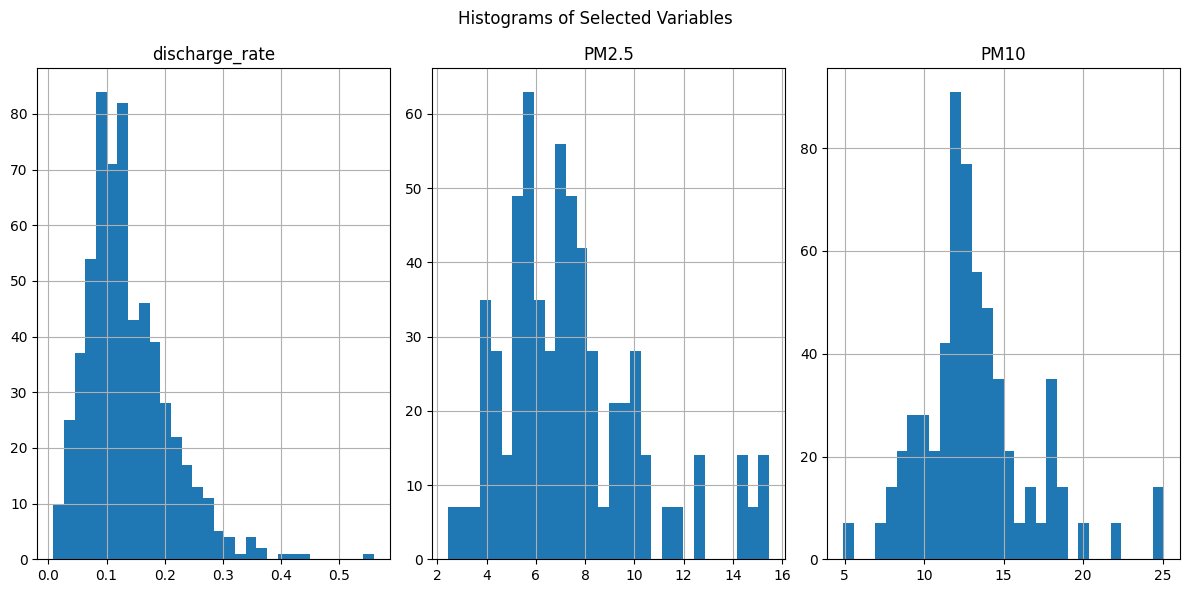

In [64]:
#plot distribution
mydata[numeric_cols].hist(bins=30, figsize=(12, 6), layout=(1, 3))
plt.suptitle('Histograms of Selected Variables')
plt.tight_layout()
plt.show()


In [65]:
#scale the data
columns_to_scale = ['discharge_rate', 'PM2.5', 'PM10']
data_to_scale = mydata[columns_to_scale]
scaler = StandardScaler()
scaled_array = scaler.fit_transform(data_to_scale)

#set as to DataFrame
scaled_df = pd.DataFrame(scaled_array, columns=columns_to_scale)
mydata_scaled = mydata.copy()
mydata_scaled[columns_to_scale] = scaled_df

In [66]:
#melt the data to long format for plotting multiple variables
long_data = pd.melt(
    mydata_scaled,
    id_vars=['date', 'County', 'ISHMT'],
    value_vars=['discharge_rate', 'PM2.5', 'PM10'],
    var_name='Variable',
    value_name='Value'
)
long_data

,date,County,ISHMT,Variable,Value
0,2020-06-01,Cork,Acute upper respiratory infections & influenza...,discharge_rate,-1.627945
1,2020-07-01,Cork,Acute upper respiratory infections & influenza...,discharge_rate,-1.580638
2,2020-08-01,Cork,Acute upper respiratory infections & influenza...,discharge_rate,-1.367760
3,2020-09-01,Cork,Acute upper respiratory infections & influenza...,discharge_rate,-1.036616
4,2020-10-01,Cork,Acute upper respiratory infections & influenza...,discharge_rate,-1.367760
...,...,...,...,...,...
1801,2023-08-01,Dublin,Pneumonia (J12-J18),PM10,-1.255000
1802,2023-09-01,Dublin,Pneumonia (J12-J18),PM10,-0.022975
1803,2023-10-01,Dublin,Pneumonia (J12-J18),PM10,0.073045
1804,2023-11-01,Dublin,Pneumonia (J12-J18),PM10,0.171134


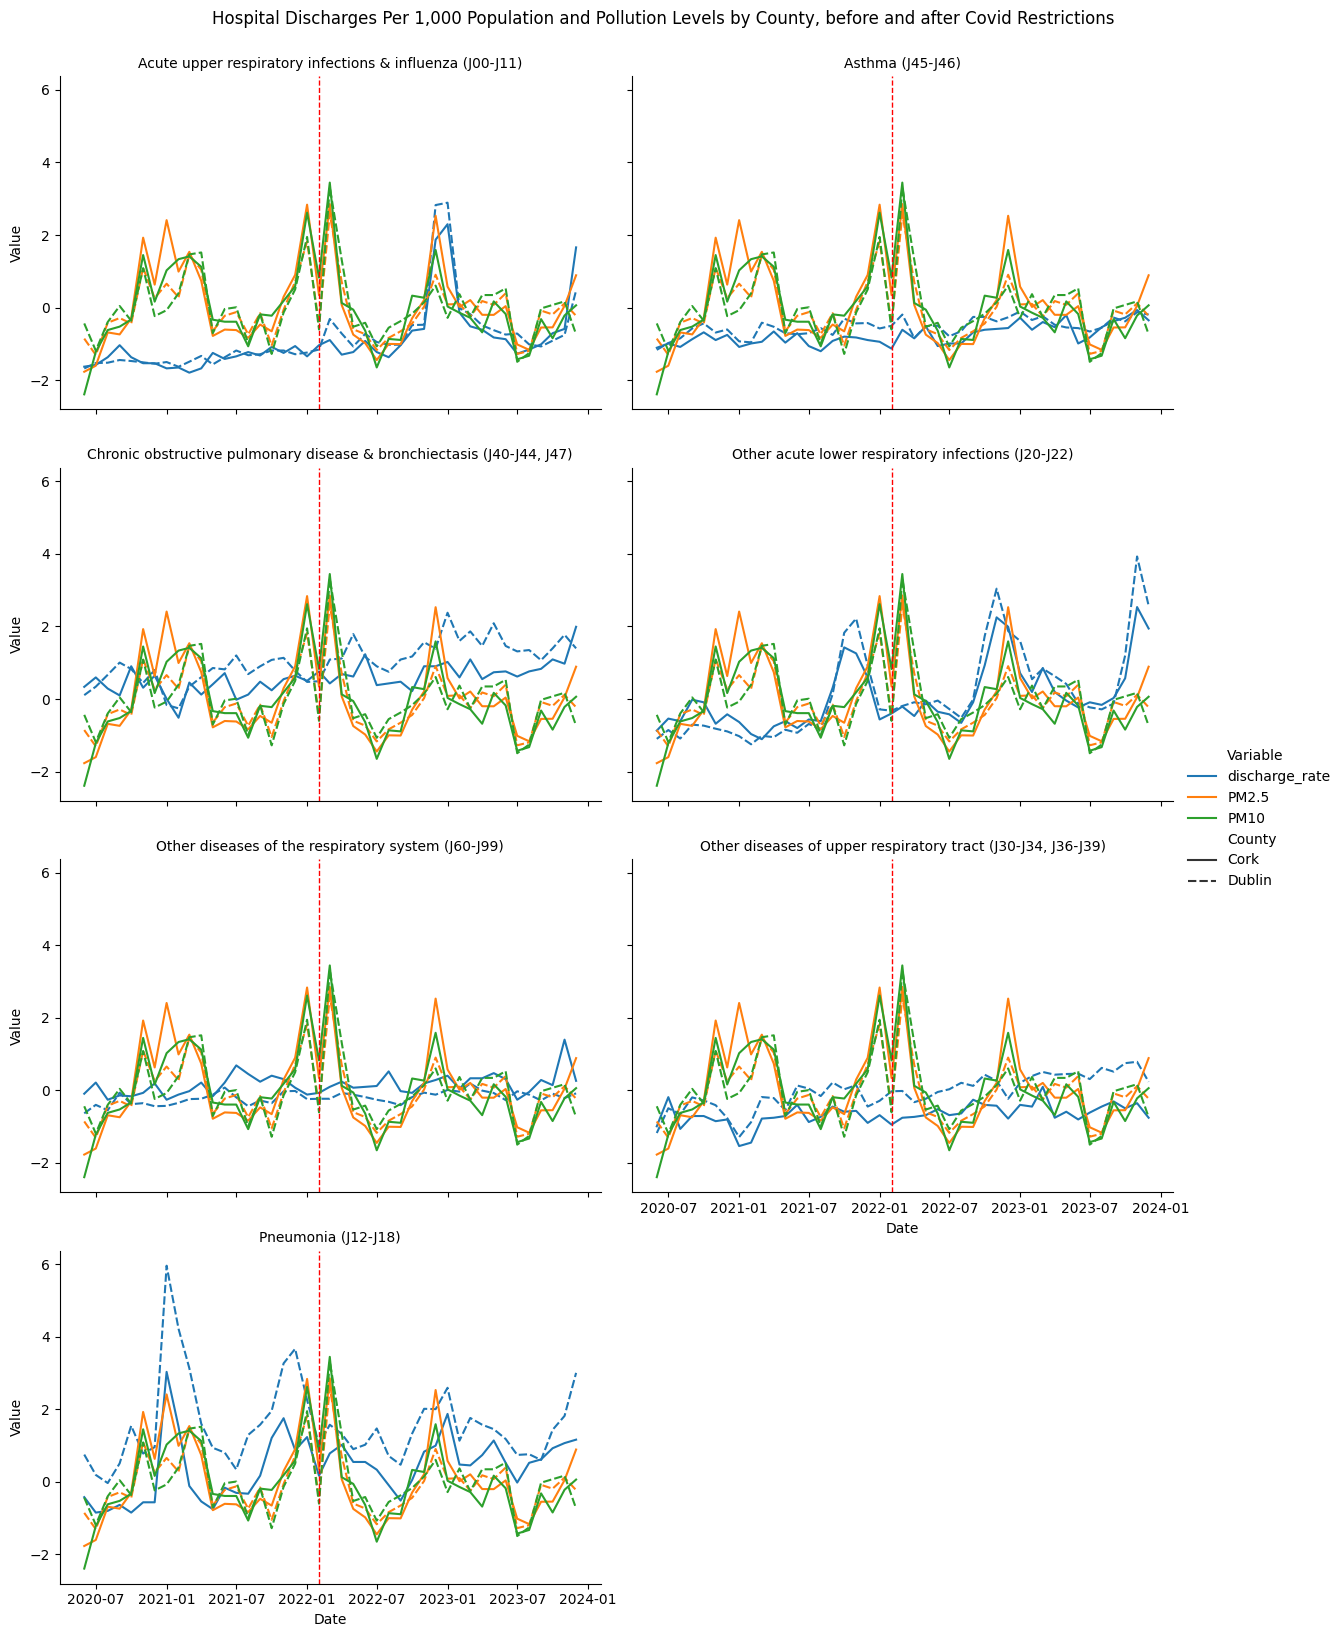

In [67]:
#facetgrid again to look at the variables scaled from before and after the last of the Covid Restrictions in Feb 22
g = sns.relplot(
    data=long_data,
    x='date', y='Value',
    kind='line',
    hue='Variable',  
    col='ISHMT',
    col_wrap=2,
    height=4,
    aspect=1.5,
    style='County'   
)

#set titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('Date', 'Value')
g.fig.suptitle('Hospital Discharges Per 1,000 Population and Pollution Levels by County, before and after Covid Restrictions', y=1.02)

#add vertical line after last covid restriction lifted in Feb 2022
vline_date = pd.to_datetime('2022-02-01')
for ax in g.axes.flat:
    ax.axvline(x=vline_date, color='red', linestyle='--', linewidth=1)
#save figure
g.savefig('discharges_pm25_pm10_overlay.png', format='png', bbox_inches='tight')

plt.show()


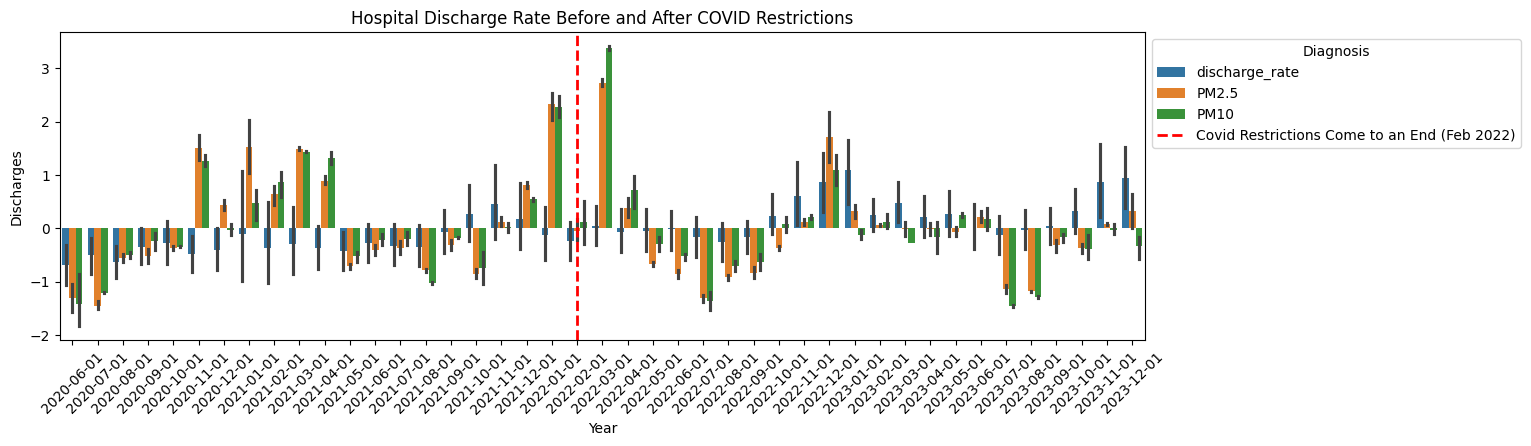

In [68]:
#start to visualise what that looks like
fig, ax = plt.subplots(figsize=(14, 4)) 
sns.barplot(data=long_data, x='date', y='Value', hue='Variable',ax=ax)

plt.title('Hospital Discharge Rate Before and After COVID Restrictions')
plt.xlabel('Year')
plt.ylabel('Discharges')
plt.xticks(rotation=45)  

#add date to draw
vline_date = '2022-02-01'
ax.axvline(x=vline_date, color='red', linestyle='--', linewidth=2, label='Covid Restrictions Come to an End (Feb 2022)')

plt.legend(title='Diagnosis', bbox_to_anchor=(1, 1), loc='upper left')
#plt.tight_layout()
plt.show()

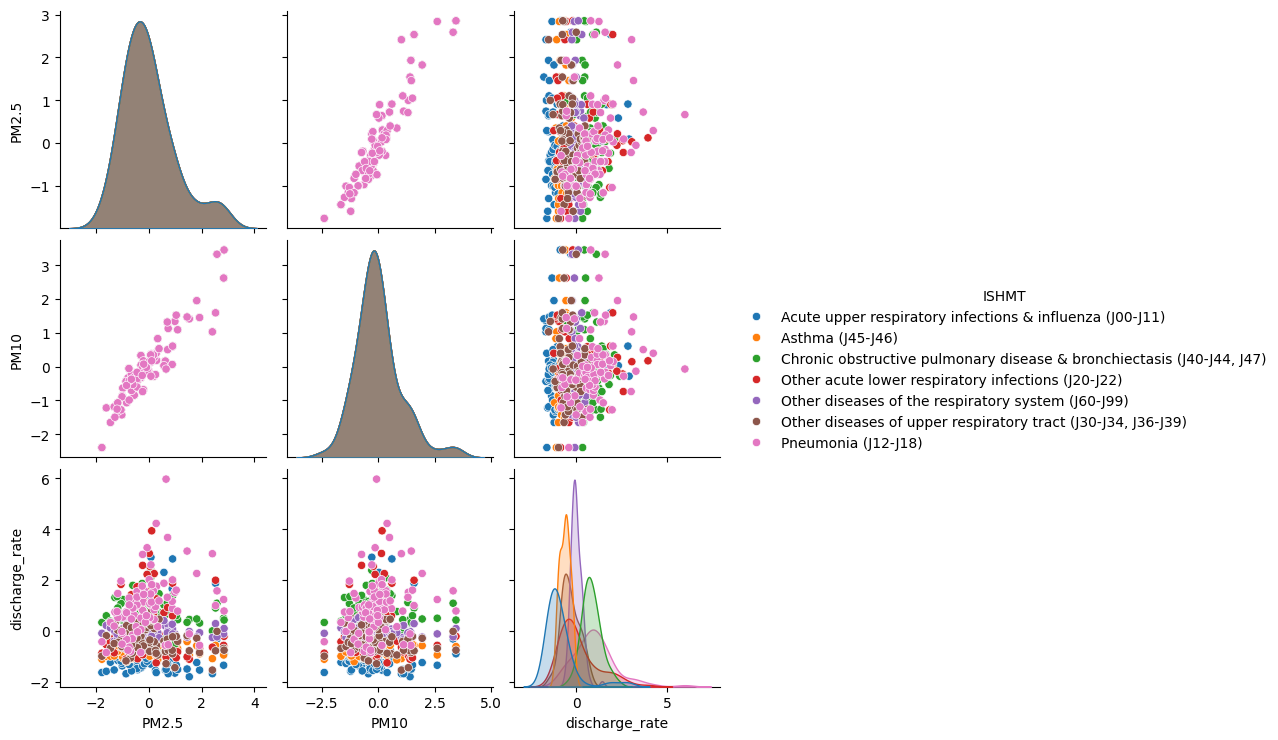

In [69]:
#columns for pairplot
pais_data = mydata_scaled[['date','County','PM2.5','PM10','ISHMT','discharge_rate']]

#lot
sns.pairplot(pais_data, hue='ISHMT')
plt.show()

#pm2.5 and pm10 are corelated.. maybe leave one out of each model